# A tutorial on Scikit-Learn Pipeline, ColumnTransformer, and FeatureUnion

Tutorial Page:
http://www.sefidian.com/2022/05/30/a-tutorial-on-scikit-learn-pipeline-columntransformer-and-featureunion/

In [16]:
#Set seed
seed = 123
 
#Import package / module for data
import pandas as pd
from seaborn import load_dataset
 
#Importing modules for Feature Engineering and modeling
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
 
#Loading data sets
df = load_dataset('tips').drop(columns=['tip', 'sex']).sample(n=5, random_state=seed)
 
#Add missing values
df.iloc[[1, 2, 4], [2, 4]] = np.nan
df

,total_bill,smoker,day,time,size
112,38.07,No,Sun,Dinner,3.0
19,20.65,No,NaN,Dinner,NaN
187,30.46,Yes,NaN,Dinner,NaN
169,10.63,Yes,Sat,Dinner,2.0
31,18.35,No,NaN,Dinner,NaN


In [4]:
#Partition data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['total_bill', 'size']),
                                                    df['total_bill'],
                                                    test_size=.2,
                                                    random_state=seed)

## Without Pipelines

In [6]:
# Input training data
imputer = SimpleImputer(strategy='constant', fill_value='missing')
X_train_imputed = imputer.fit_transform(X_train)

# Coding training data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train_imputed)

# Check the data before and after the training
print("******************** Training data ********************")
display(X_train)
display(pd.DataFrame(X_train_imputed, columns=X_train.columns))
display(pd.DataFrame(X_train_encoded,
        columns=encoder.get_feature_names_out(X_train.columns)))

# Convert test data
X_test_imputed = imputer.transform(X_test)
X_test_encoded = encoder.transform(X_test_imputed)

# Check the data before and after the test
print("******************** Test data ********************")
display(X_test)
display(pd.DataFrame(X_test_imputed, columns=X_train.columns))
display(pd.DataFrame(X_test_encoded,
        columns=encoder.get_feature_names_out(X_train.columns)))

******************** Training data ********************


,smoker,day,time
169,Yes,Sat,Dinner
31,No,NaN,Dinner
112,No,Sun,Dinner
187,Yes,NaN,Dinner


,smoker,day,time
0,Yes,Sat,Dinner
1,No,missing,Dinner
2,No,Sun,Dinner
3,Yes,missing,Dinner


,smoker_No,smoker_Yes,day_Sat,day_Sun,day_missing,time_Dinner
0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,1.0


******************** Test data ********************


,smoker,day,time
19,No,NaN,Dinner


,smoker,day,time
0,No,missing,Dinner


,smoker_No,smoker_Yes,day_Sat,day_Sun,day_missing,time_Dinner
0,1.0,0.0,0.0,0.0,1.0,1.0


# Scikit-Learn Pipelines

In [12]:
# Match pipes to training data
pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                 ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])
pipe.fit(X_train)

# Check the data before and after the training
print("******************** Training data ********************")
display(X_train)
display(pd.DataFrame(pipe.transform(X_train),
        columns=pipe['encoder'].get_feature_names_out(X_train.columns)))

# Check the data before and after the test
print("******************** Test data ********************")
display(X_test)
display(pd.DataFrame(pipe.transform(X_test),
        columns=pipe['encoder'].get_feature_names_out(X_train.columns)))

******************** Training data ********************


,smoker,day,time
169,Yes,Sat,Dinner
31,No,NaN,Dinner
112,No,Sun,Dinner
187,Yes,NaN,Dinner


,smoker_No,smoker_Yes,day_Sat,day_Sun,day_missing,time_Dinner
0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,1.0


******************** Test data ********************


,smoker,day,time
19,No,NaN,Dinner


,smoker_No,smoker_Yes,day_Sat,day_Sun,day_missing,time_Dinner
0,1.0,0.0,0.0,0.0,1.0,1.0


## Add ML model without pipeline

In [14]:
#Input training data
imputer = SimpleImputer(strategy='constant', fill_value='missing')
X_train_imputed = imputer.fit_transform(X_train)
 
#Coding training data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train_imputed)
 
#Make the model fit the training data
model = LinearRegression()
model.fit(X_train_encoded, y_train)
 
#Forecast training data
y_train_pred = model.predict(X_train_encoded)
print(f"Predictions on training data: {y_train_pred}")
 
#Convert test data
X_test_imputed = imputer.transform(X_test)
X_test_encoded = encoder.transform(X_test_imputed)
 
#Forecast test data
y_test_pred = model.predict(X_test_encoded)
print(f"Predictions on test data: {y_test_pred}")

Predictions on training data: [10.63 18.35 38.07 30.46]
Predictions on test data: [18.35]


## Add ML model to the pipeline

In [15]:
# Match pipes to training data
pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                 ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
                 ('model', LinearRegression())])
pipe.fit(X_train, y_train)

# Forecast training data
y_train_pred = pipe.predict(X_train)
print(f"Predictions on training data: {y_train_pred}")

# Forecast test data
y_test_pred = pipe.predict(X_test)
print(f"Predictions on test data: {y_test_pred}")

Predictions on training data: [10.63 18.35 38.07 30.46]
Predictions on test data: [18.35]


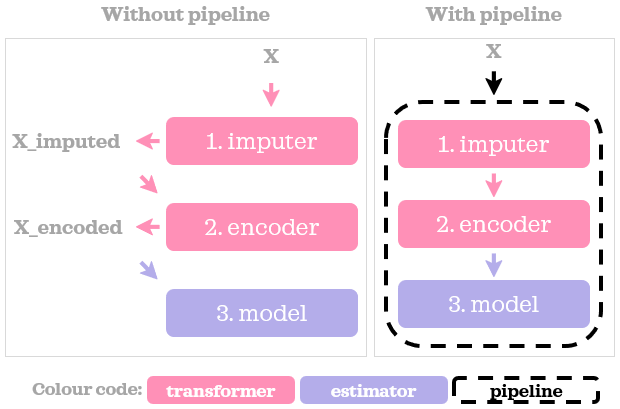

# Scikit-Learn ColumnTransformer

In [17]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['total_bill']),
                                                    df['total_bill'],
                                                    test_size=.2,
                                                    random_state=seed)

# Define classification columns
categorical = list(X_train.select_dtypes('category').columns)
print(f"Categorical columns are: {categorical}")

# Define numeric columns
numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['smoker', 'day', 'time']
Numerical columns are: ['size']


In [19]:
# Define classification pipeline
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Make columntransformer fit training data
preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, categorical)],
                                 remainder='passthrough')
preprocessor.fit(X_train)

# Ready to list
cat_columns = preprocessor.named_transformers_[
    'cat']['encoder'].get_feature_names_out(categorical)
columns = np.append(cat_columns, numerical)

# Check the data before and after the training
print("******************** Training data ********************")
display(X_train)
display(pd.DataFrame(preprocessor.transform(X_train), columns=columns))

# Check the data before and after the test
print("******************** Test data ********************")
display(X_test)
display(pd.DataFrame(preprocessor.transform(X_test), columns=columns))

******************** Training data ********************


,smoker,day,time,size
169,Yes,Sat,Dinner,2.0
31,No,NaN,Dinner,NaN
112,No,Sun,Dinner,3.0
187,Yes,NaN,Dinner,NaN


,smoker_No,smoker_Yes,day_Sat,day_Sun,day_missing,time_Dinner,size
0,0.0,1.0,1.0,0.0,0.0,1.0,2.0
1,1.0,0.0,0.0,0.0,1.0,1.0,NaN
2,1.0,0.0,0.0,1.0,0.0,1.0,3.0
3,0.0,1.0,0.0,0.0,1.0,1.0,NaN


******************** Test data ********************


,smoker,day,time,size
19,No,NaN,Dinner,NaN


,smoker_No,smoker_Yes,day_Sat,day_Sun,day_missing,time_Dinner,size
0,1.0,0.0,0.0,0.0,1.0,1.0,NaN


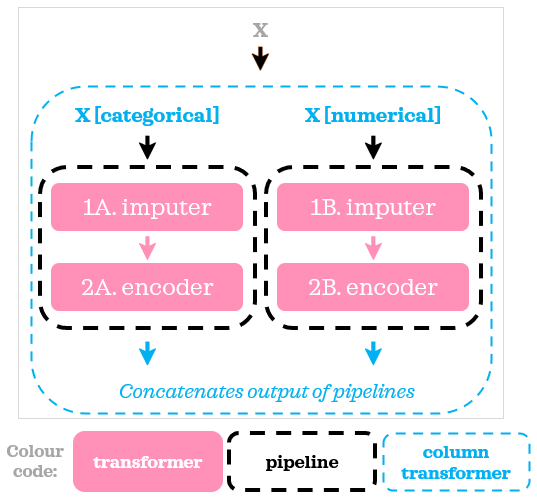

In [20]:
# Define classification pipeline
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define value pipeline
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', MinMaxScaler())])

# Make columntransformer fit training data
preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, categorical),
                                               ('num', num_pipe, numerical)])
preprocessor.fit(X_train)

# Ready to list
cat_columns = preprocessor.named_transformers_[
    'cat']['encoder'].get_feature_names_out(categorical)
columns = np.append(cat_columns, numerical)

# Check the data before and after the training
print("******************** Training data ********************")
display(X_train)
display(pd.DataFrame(preprocessor.transform(X_train), columns=columns))

# Check the data before and after the test
print("******************** Test data ********************")
display(X_test)
display(pd.DataFrame(preprocessor.transform(X_test), columns=columns))

******************** Training data ********************


,smoker,day,time,size
169,Yes,Sat,Dinner,2.0
31,No,NaN,Dinner,NaN
112,No,Sun,Dinner,3.0
187,Yes,NaN,Dinner,NaN


,smoker_No,smoker_Yes,day_Sat,day_Sun,day_missing,time_Dinner,size
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.5
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.5


******************** Test data ********************


,smoker,day,time,size
19,No,NaN,Dinner,NaN


,smoker_No,smoker_Yes,day_Sat,day_Sun,day_missing,time_Dinner,size
0,1.0,0.0,0.0,0.0,1.0,1.0,0.5


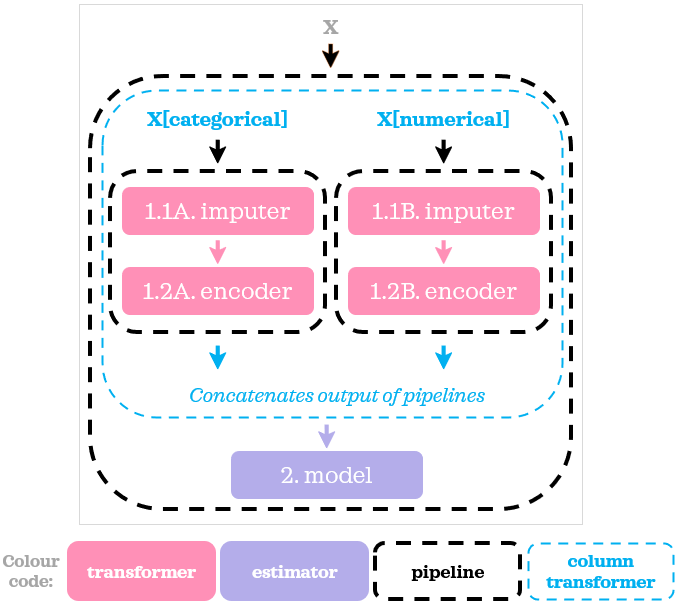

In [21]:
# Define classification pipeline
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define value pipeline
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', MinMaxScaler())])

# Combined classification pipeline and numerical pipeline
preprocessor = ColumnTransformer(transformers=[('cat', cat_pipe, categorical),
                                               ('num', num_pipe, numerical)])

# Install transformer and training data estimator on the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', LinearRegression())])
pipe.fit(X_train, y_train)

# Forecast training data
y_train_pred = pipe.predict(X_train)
print(f"Predictions on training data: {y_train_pred}")

# Forecast test data
y_test_pred = pipe.predict(X_test)
print(f"Predictions on test data: {y_test_pred}")

Predictions on training data: [10.63 18.35 38.07 30.46]
Predictions on test data: [18.35]


# Scikit-Learn FeatureUnion

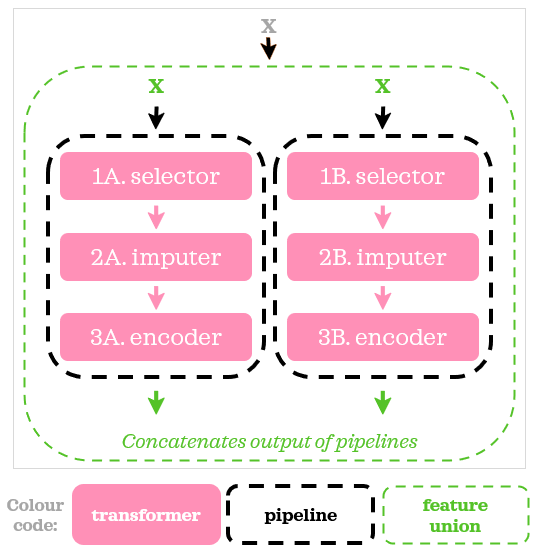

In [22]:
# Custom pipe
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""

    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]


# Define classification pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(
                         strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define value pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical)),
                     ('imputer', SimpleImputer(strategy='median')),
                     ('scaler', MinMaxScaler())])

# Featureunion fitting training data
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])
preprocessor.fit(X_train)

# Ready to list
cat_columns = preprocessor.transformer_list[0][1][2].get_feature_names_out(
    categorical)
columns = np.append(cat_columns, numerical)

# Check the data before and after the training
print("******************** Training data ********************")
display(X_train)
display(pd.DataFrame(preprocessor.transform(X_train), columns=columns))

# Check the data before and after the test
print("******************** Test data ********************")
display(X_test)
display(pd.DataFrame(preprocessor.transform(X_test), columns=columns))

******************** Training data ********************


,smoker,day,time,size
169,Yes,Sat,Dinner,2.0
31,No,NaN,Dinner,NaN
112,No,Sun,Dinner,3.0
187,Yes,NaN,Dinner,NaN


,smoker_No,smoker_Yes,day_Sat,day_Sun,day_missing,time_Dinner,size
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.5
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.5


******************** Test data ********************


,smoker,day,time,size
19,No,NaN,Dinner,NaN


,smoker_No,smoker_Yes,day_Sat,day_Sun,day_missing,time_Dinner,size
0,1.0,0.0,0.0,0.0,1.0,1.0,0.5


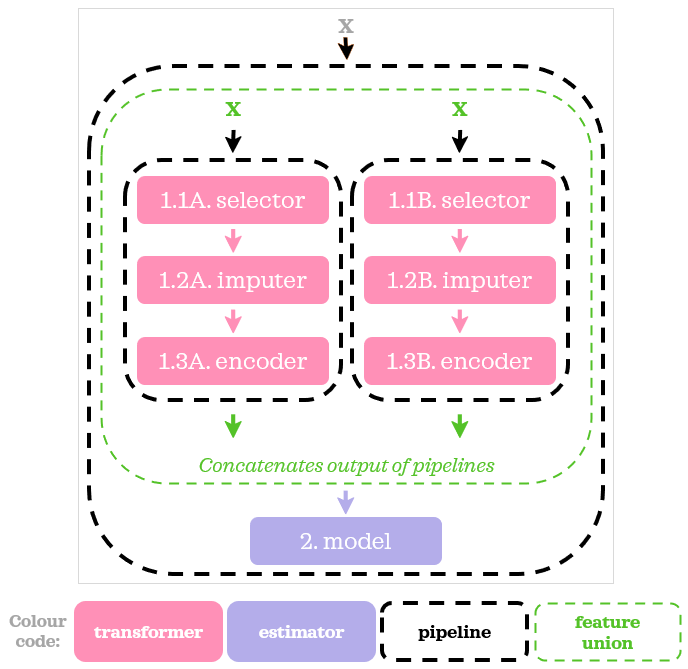

In [23]:
# Define classification pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(
                         strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define value pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical)),
                     ('imputer', SimpleImputer(strategy='median')),
                     ('scaler', MinMaxScaler())])

# Combined classification pipeline and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Combined classification pipeline and numerical pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', LinearRegression())])
pipe.fit(X_train, y_train)

# Forecast training data
y_train_pred = pipe.predict(X_train)
print(f"Predictions on training data: {y_train_pred}")

# Forecast test data
y_test_pred = pipe.predict(X_test)
print(f"Predictions on test data: {y_test_pred}")

Predictions on training data: [10.63 18.35 38.07 30.46]
Predictions on test data: [18.35]


# Bonus Example: NLP pipelines

In [30]:
import numpy as np
import pandas as pd

from nltk.tokenize import RegexpTokenizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

# Create a small sample data
X_train = pd.DataFrame(data={'document': ['Food was good.', 
                                          'Superb food :)',
                                          'Absolutely superb!']})
X_train

,document
0,Food was good.
1,Superb food :)
2,Absolutely superb!


## a) Without Pipeline

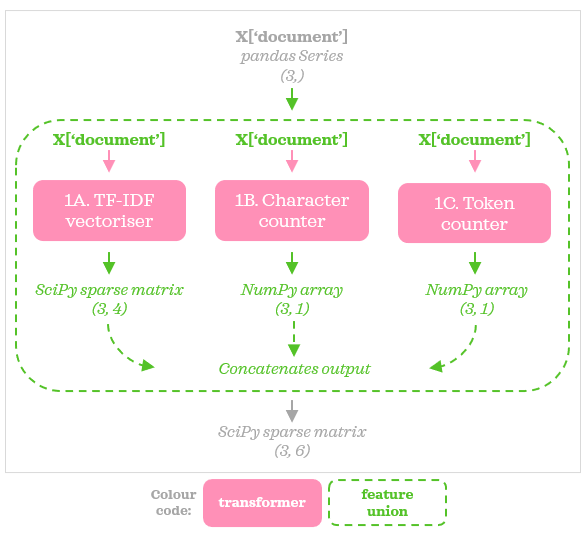

In [39]:
# Define custom transformers
class CharacterCounter(BaseEstimator, TransformerMixin):
    """Count the number of characters in a document."""

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        n_characters = X.str.len()
        return n_characters.values.reshape(-1, 1)  # 2D array


class TokenCounter(BaseEstimator, TransformerMixin):
    """Count the number of tokens in a document."""

    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.tokeniser = RegexpTokenizer(r'[A-Za-z]+')
        return self

    def transform(self, X):
        n_tokens = X.apply(lambda document: len(
            self.tokeniser.tokenize(document)))
        return n_tokens.values.reshape(-1, 1)  # 2D array


# Build a FeatureUnion
text = 'document'

vectoriser = TfidfVectorizer(token_pattern=r'[a-z]+', stop_words='english')
character_counter = CharacterCounter()
token_counter = TokenCounter()

preprocessor = FeatureUnion([
    ('vectoriser', vectoriser),
    ('character_counter', character_counter),
    ('token_counter', token_counter)
])

preprocessor.fit(X_train[text])

# Transform the data and format for readibility
columns = np.append(preprocessor.transformer_list[0][1].get_feature_names_out(), [
                    'n_characters', 'n_tokens'])
X_train_transformed = pd.DataFrame(preprocessor.transform(X_train[text]).toarray(),
                                   columns=columns)
X_train_transformed

,absolutely,food,good,superb,n_characters,n_tokens
0,0.000000,0.605349,0.795961,0.000000,14.0,3.0
1,0.000000,0.707107,0.000000,0.707107,14.0,2.0
2,0.795961,0.000000,0.000000,0.605349,18.0,2.0


## b) With Pipeline

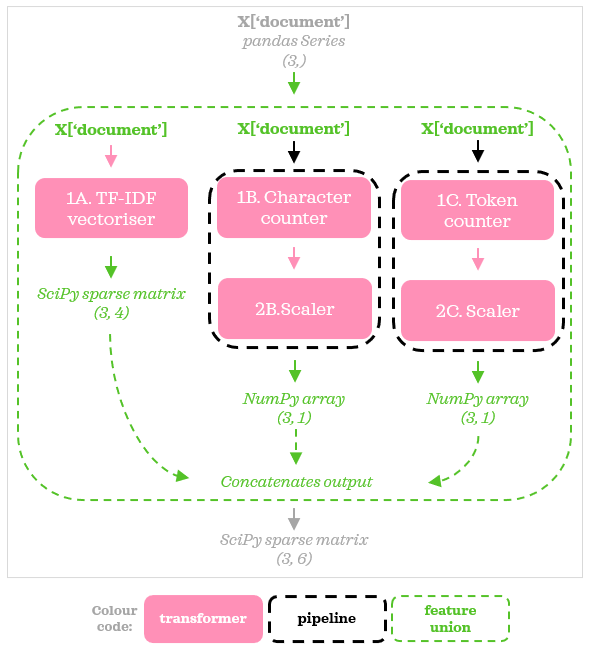

In [42]:
# Build a FeatureUnion with Pipelines
character_pipe = Pipeline([
    ('character_counter', CharacterCounter()),
    ('scaler', MinMaxScaler())
])

token_pipe = Pipeline([
    ('token_counter', TokenCounter()),
    ('scaler', MinMaxScaler())
])

preprocessor = FeatureUnion([
    ('vectoriser', vectoriser),
    ('character', character_pipe),
    ('token', token_pipe)
])

preprocessor.fit(X_train[text])

# Transform the data and format for readibility
columns = np.append(preprocessor.transformer_list[0][1].get_feature_names_out(
), ['n_characters', 'n_tokens'])
X_train_transformed = pd.DataFrame(preprocessor.transform(X_train[text]).toarray(),
                                   columns=columns)
X_train_transformed

,absolutely,food,good,superb,n_characters,n_tokens
0,0.000000,0.605349,0.795961,0.000000,0.0,1.0
1,0.000000,0.707107,0.000000,0.707107,0.0,0.0
2,0.795961,0.000000,0.000000,0.605349,1.0,0.0


## Using Sequential Transformers

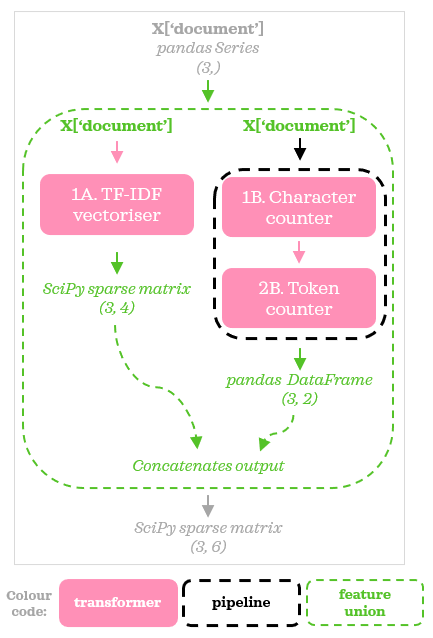

In [43]:
# Define sample customer transformers
class CharacterCounter(BaseEstimator, TransformerMixin):
    """Count the number of characters in a document."""

    def __init__(self):
        pass

    def fit(self, X, y=None):

        return self

    def transform(self, X):
        n_characters = X.str.len().rename('n_characters')
        df = pd.concat([X, n_characters], axis=1)
        return df


class TokenCounter(BaseEstimator, TransformerMixin):
    """Count the number of tokens in a document."""

    def __init__(self, col=None):
        self.col = col

    def fit(self, X, y=None):
        self.tokeniser = RegexpTokenizer(r'[A-Za-z]+')
        return self

    def transform(self, X):
        df = X.copy()
        df['n_tokens'] = df[self.col].apply(
            lambda document: len(self.tokeniser.tokenize(document)))
        return df.drop(columns=self.col)


# Build a FeatureUnion with Pipeline
counter_pipe = Pipeline([
    ('character_counter', CharacterCounter()),
    ('token_counter', TokenCounter(text))
])

preprocessor = FeatureUnion([
    ('vectoriser', vectoriser),
    ('counter', counter_pipe)
])

preprocessor.fit(X_train[text])

# Transform the data and format for readibility
columns = np.append(preprocessor.transformer_list[0][1].get_feature_names_out(
), ['n_characters', 'n_tokens'])
X_train_transformed = pd.DataFrame(preprocessor.transform(X_train[text]).toarray(),
                                   columns=columns)
X_train_transformed

,absolutely,food,good,superb,n_characters,n_tokens
0,0.000000,0.605349,0.795961,0.000000,14.0,3.0
1,0.000000,0.707107,0.000000,0.707107,14.0,2.0
2,0.795961,0.000000,0.000000,0.605349,18.0,2.0


## With ColumnTransformer

In [44]:
# Add two numerical columns
X_train['has_tipped'] = [1, 0, 1]
X_train['rating'] = [4, np.nan, 5]
X_train

,document,has_tipped,rating
0,Food was good.,1,4.0
1,Superb food :),0,NaN
2,Absolutely superb!,1,5.0


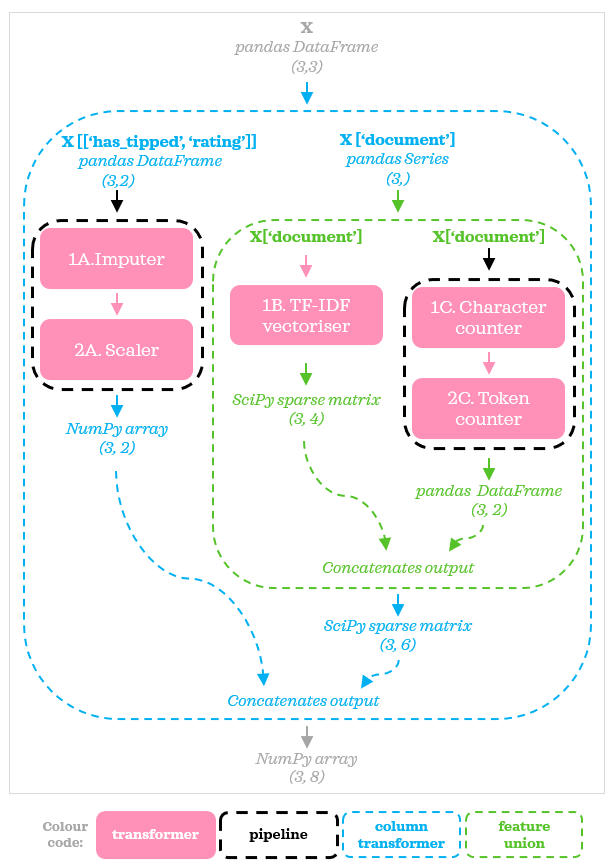

In [63]:
# Build a ColumnTransformer with FeatureUnion
numerical = ['has_tipped', 'rating']

text_union = FeatureUnion([
    ('vectoriser', vectoriser),
    ('counter', counter_pipe)
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numerical),
    ('text', text_union, text)
])

preprocessor.fit(X_train)

# Transform the data and format for readibility
terms = preprocessor.named_transformers_[
    'text'].transformer_list[0][1].get_feature_names_out()
columns = np.concatenate((numerical, terms, ['n_characters', 'n_tokens']))
X_train_transformed = pd.DataFrame(
    preprocessor.transform(X_train), columns=columns)
X_train_transformed

,has_tipped,rating,absolutely,food,good,superb,n_characters,n_tokens
0,1.0,0.0,0.000000,0.605349,0.795961,0.000000,14.0,3.0
1,0.0,0.5,0.000000,0.707107,0.000000,0.707107,14.0,2.0
2,1.0,1.0,0.795961,0.000000,0.000000,0.605349,18.0,2.0


In [64]:
# Create sample test data
X_test = pd.DataFrame({"document": ["Absolutely fantastic food"],
                       "has_tipped": [1],
                       "rating": [np.nan]})

# Preprocess the test data
preprocessor.transform(X_test)

array([[ 1.        ,  0.5       ,  0.79596054,  0.60534851,  0.        ,
         0.        , 25.        ,  3.        ]])

# Summary

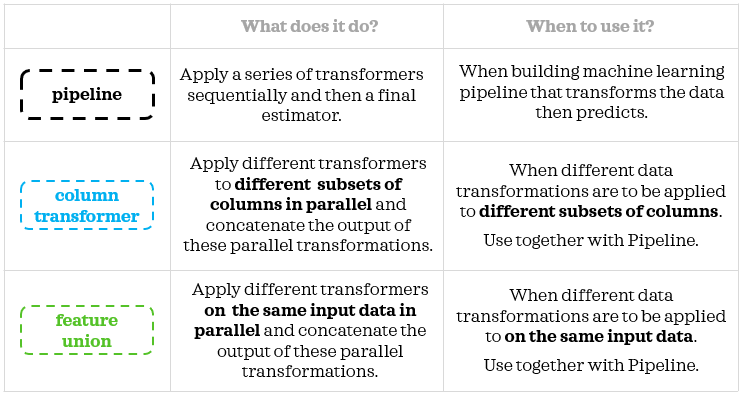